In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn import preprocessing
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rojal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rojal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
'''
Todo for today
-> clean the text messages 
-> convert the spam and ham to binary 
-> make a graph to see the ouliers
-> fix outliers and make a graph to see the difference after removing outliers
-> make train and Test Splits
'''

'\nTodo for today\n-> clean the text messages \n-> convert the spam and ham to binary \n-> make a graph to see the ouliers\n-> fix outliers and make a graph to see the difference after removing outliers\n-> make train and Test Splites\n'

In [4]:
data = pd.read_csv('spam.csv',encoding='latin-1')


In [5]:
drop_it = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[drop_it], axis=1)

In [6]:
data.rename(columns={'v1':'SpamOrHam','v2':'message'}, inplace=True)
# convert spam to 1 and ham to 0
data['SpamOrHam'] = data['SpamOrHam'].replace({'spam':1,'ham':0})

In [7]:
data

,SpamOrHam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


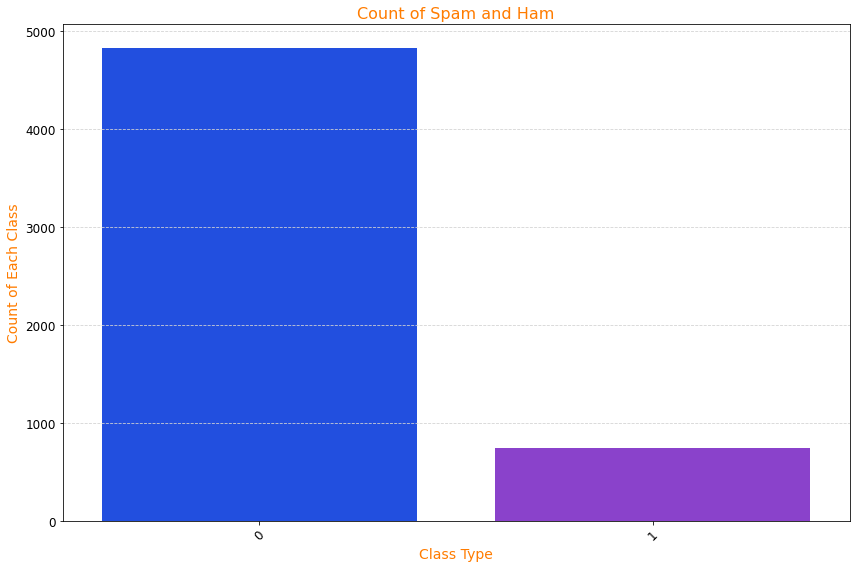

In [8]:
# we visualize the Count of the class of the message if its Spam or Ham
# Set the figure size
plt.figure(figsize=(12, 8))

colors = ["#023EFF", "#8B2BE2"]
sns.set_palette(colors)

ax = sns.countplot(x=data["SpamOrHam"])

ax.set_title('Count of Spam and Ham', color="#FF7C00", fontsize=16)
ax.set_xlabel('Class Type', color="#FF7C00", fontsize=14)
ax.set_ylabel('Count of Each Class', color="#FF7C00", fontsize=14)

ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()

plt.show()


In [9]:
# Some engineering features
# we add some futrther columns like number of sentences and number of words etc..

# number of words
data['words_num'] = data['message'].apply(lambda s: len(re.findall(r'\w+', s)))
# number of characters (is not that interessting because it contains some junk/extra unwanted symbols)
data['char_num'] = data['message'].apply(len)
# number of sentences
'''
# another variant to count sentence
def count_sentences(text):
    sentences = re.split(r'[.?!]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

data["No_of_sentencessss"] = data["message"].apply(count_sentences)
'''

data["No_of_sentencess"] = data["message"].apply(lambda x: len(nltk.sent_tokenize(x)))

# number of upper characters
data["num_uppercase_charss"] = data["message"].apply(lambda s: sum(c.isupper() for c in s))

<Figure size 864x576 with 0 Axes>

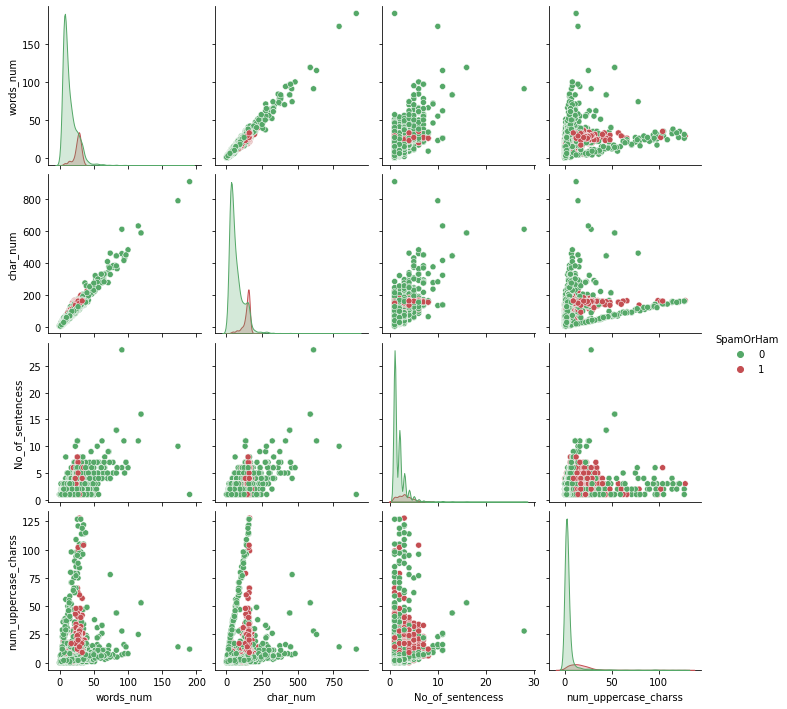

In [10]:
# see all outliers 
cols = ["#55A868", "#C44E52"]
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="SpamOrHam",palette=cols)
plt.show(fg)

<small> We can see from the graph there are some outliers and this need to be fixed </small>

In [11]:
#Dropping the outliers. 
data = data[(data["char_num"]<400)]
data = data[(data["words_num"]<100)]
data = data[(data["No_of_sentencess"]<11)]
data.shape

(5550, 6)

<Figure size 864x576 with 0 Axes>

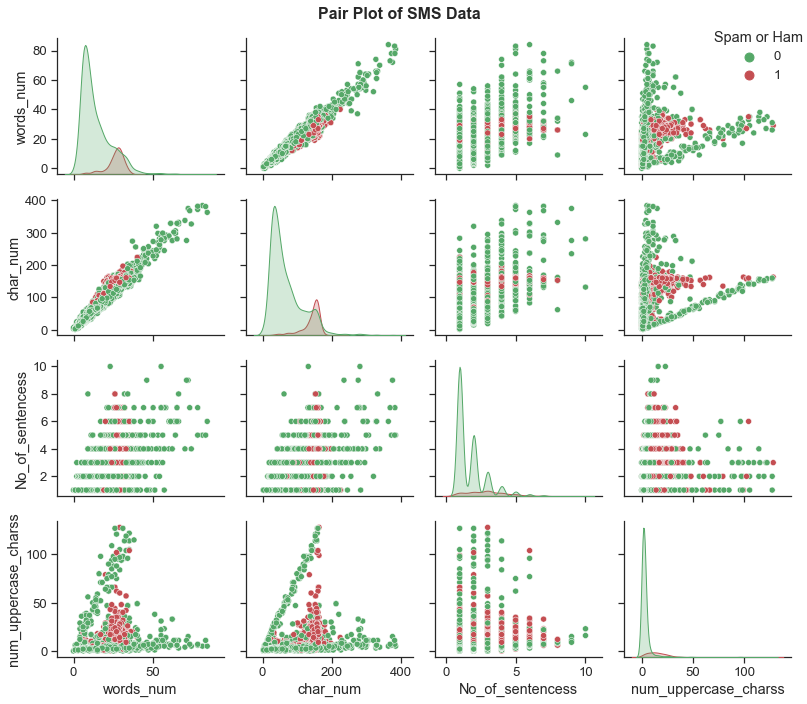

In [12]:
# Graph after deleting the outliers
# Set the color palette
cols = ["#55A868", "#C44E52"]

# Set the style and context for the plot
sns.set(style="ticks", font_scale=1.2)

# Create the pair plot
plt.figure(figsize=(12, 8))
fg = sns.pairplot(data=data, hue="SpamOrHam", palette=cols)

# Set the title
plt.suptitle("Pair Plot of SMS Data", fontsize=16, fontweight='bold')

# Adjust the legend
fg._legend.set_title("Spam or Ham")
handles = fg._legend.legendHandles
fg._legend.set_bbox_to_anchor((1, 0.9))
for handle in handles:
    handle.set_sizes([80])

# Adjust the subplot titles
for ax in fg.axes.flat:
    ax.title.set_fontsize(12)

# Remove the upper triangle of empty subplots
fg.map_upper(plt.scatter, alpha=0)

plt.tight_layout()
plt.show()

### Data Preprocessing

<small> The text is disorganized and requires cleaning to eliminate extraneous points, semicolons, and other irrelevant characters. It would greatly benefit from refinement to improve its value. </small>


In [13]:
def text_cleaning(text):
    fix = re.sub('[^a-zA-Z]', ' ', text)
    fix = text.lower()
    fix = fix.split()
    # Remove multiple points at the end of sentences
    fix = [re.sub('\.{2,}$', '', word) for word in fix]
    
    fix = ' '.join(fix)
    
    return fix
    
data['cleaned_Text'] = data['message'].apply(text_cleaning)

In [14]:
data

,SpamOrHam,message,words_num,char_num,No_of_sentencess,num_uppercase_charss,cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,2,3,"go until jurong point, crazy available only in..."
1,0,Ok lar... Joking wif u oni...,6,29,2,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,33,155,2,10,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,11,49,1,2,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",14,61,1,2,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,33,161,4,9,this is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,8,37,1,2,will ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",10,57,2,2,"pity, * was in mood for that. so...any other s..."
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,2,the guy did some bitching but i acted like i'd...


In [15]:
# Standardizing 
# scaling the values so that they have similar ranges or scales

# Specify the columns to scale
columns_to_scale = ["words_num", "char_num", "No_of_sentencess", "num_uppercase_charss"]

# Create a new DataFrame for scaled values
scaled_df = data[columns_to_scale].copy()

# usage of StandardScaller
# Scale the selected columns
scl = preprocessing.StandardScaler()
scaled_values = scl.fit_transform(scaled_df.values)
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

# Update the original DataFrame with the scaled values
complete_df = data.copy()
complete_df[columns_to_scale] = scaled_df

In [16]:
complete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SpamOrHam,5550.0,0.134595,0.341321,0.000000,0.000000,0.000000,0.000000,1.000000
words_num,5528.0,-0.000214,0.999929,-1.502164,-0.840241,-0.367440,0.767285,6.440909
char_num,5528.0,-0.000093,0.999920,-1.427329,-0.812885,-0.328777,0.788394,5.685330
No_of_sentencess,5528.0,0.000089,1.000419,-0.735735,-0.735735,-0.735735,0.048917,6.326137
num_uppercase_charss,5528.0,0.000817,1.001767,-0.498015,-0.407286,-0.316556,-0.135097,11.115364


In [17]:
complete_df
'''
todo
->  having issues with NAN in the last rows
->  text extra cleaning symbols like  (*, / , $ ,...) are not necessary
'''

,SpamOrHam,message,words_num,char_num,No_of_sentencess,num_uppercase_charss,cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",0.389044,0.602199,0.048917,-0.225827,"go until jurong point, crazy available only in..."
1,0,Ok lar... Joking wif u oni...,-0.934802,-0.924602,0.048917,-0.316556,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1.618329,1.421458,0.048917,0.409280,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,-0.462000,-0.552212,-0.735735,-0.316556,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",-0.178319,-0.328777,-0.735735,-0.316556,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,NaN,this is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,NaN,will ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,"pity, * was in mood for that. so...any other s..."
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,NaN,the guy did some bitching but i acted like i'd...


### Train and Test split

In [19]:
# -> improvment make it as csv file

spam_words = { "as seen on", "buy", "buy direct", "buying judgments", "clearance", "order", "order status", "orders shipped by shopper",
    "dig up dirt on friends", "meet singles", "score with babes", "xxx", "near you",
    "additional income", "be your own boss", "compete for your business", "double your", "earn $", "earn extra cash", "earn per week",
    "expect to earn", "extra income", "home based", "home employment", "homebased business", "income from home", "make $", "make money",
    "money making", "online biz opportunity", "online degree", "opportunity", "potential earnings", "university diplomas", "while you sleep",
    "work at home", "work from home",
    "$$$", "affordable", "bargain", "beneficiary", "best price", "big bucks", "cash", "cash bonus", "cashcashcash", "cents on the dollar",
    "cheap", "check", "claims", "collect", "compare rates", "cost", "credit", "credit bureaus", "discount", "earn", "easy terms", "f r e e",
    "fast cash", "for just $xxx", "hidden assets", "hidden charges", "income", "incredible deal", "insurance", "investment", "loans",
    "lowest price", "million dollars", "money", "money back", "mortgage", "mortgage rates", "no cost", "no fees", "one hundred percent free",
    "only $", "pennies a day", "price", "profits", "pure profit", "quote", "refinance", "save $", "save big money", "save up to",
    "serious cash", "subject to credit", "they keep your money — no refund!", "unsecured credit", "unsecured debt", "us dollars",
    "why pay more?", "accept credit cards", "cards accepted", "check or money order", "credit card offers", "explode your business",
    "full refund", "investment decision","no credit check", "no hidden costs", "no investment", "requires initial investment", "sent in compliance", "stock alert", "stock disclaimer statement",
    "stock pick", "avoice bankruptcy", "calling creditors", "collect child support", "consolidate debt and credit", "consolidate your debt",
    "eliminate bad credit", "eliminate debt", "financially independent", "get out of debt", "get paid", "lower interest rate", "lower monthly payment",
    "lower your mortgage rate", "lowest insurance rates", "pre-approved", "refinance home", "social security number", "your income",
    "acceptance", "accordingly", "avoid", "chance", "dormant", "freedom", "here", "hidden", "home", "leave", "lifetime", "lose", "maintained", "medium",
    "miracle", "never", "passwords", "problem", "remove", "reverses", "sample", "satisfaction", "solution", "stop", "success", "teen", "wife",
    "dear [email/friend/somebody]", "friend", "hello", "ad", "auto email removal", "bulk email", "click", "click below", "click here", "click to remove",
    "direct email", "direct marketing", "email harvest", "email marketing", "form", "increase sales", "increase traffic", "increase your sales",
    "internet market", "internet marketing", "marketing", "marketing solutions", "mass email", "member", "month trial offer", "more internet traffic",
    "multi level marketing", "notspam", "one time mailing", "online marketing", "open", "opt in", "performance", "removal instructions", "sale", "sales",
    "search engine listings", "search engines", "subscribe", "the following form", "this isn't junk", "this isn't spam", "undisclosed recipient",
    "unsubscribe", "visit our website", "we hate spam", "web traffic", "will not believe your eyes", "cures baldness", "diagnostic",
    "fast viagra delivery", "human growth hormone", "life insurance", "lose weight", "lose weight spam", "medicine", "no medical exams",
    "online pharmacy", "removes wrinkles", "reverses aging", "stop snoring", "valium", "viagra", "vicodin", "weight loss", "xanax", "#1", "100% free",
    "100% satisfied", "4u", "50% off", "billion", "billion dollars", "join millions", "join millions of americans", "million",
    "one hundred percent guaranteed", "thousands", "being a member", "billing address", "call", "cannot be combined with any other offer",
    "confidentially on all orders", "deal", "financial freedom", "gift certificate", "giving away", "guarantee", "have you been turned down?",
    "if only it were that easy", "important information regarding", "in accordance with laws", "long distance phone offer", "mail in order form",
    "message contains", "name brand", "nigerian", "no age restrictions", "no catch", "no claim forms", "no disappointment", "no experience",
    "no gimmick", "no inventory", "no middleman", "no obligation", "no purchase necessary", "no questions asked", "no selling",
    "no strings attached", "no-obligation", "not intended", "obligation", "off shore", "offer", "per day", "per week", "priority mail", "prize",
    "prizes", "produced and sent out", "reserves the right", "shopping spree", "stuff on sale", "terms and conditions", "the best rates",
    "they’re just giving it away", "trial", "unlimited", "unsolicited", "vacation", "vacation offers", "warranty", "we honor all",
    "weekend getaway", "what are you waiting for?", "who really wins?", "win", "winner", "winning", "won", "you are a winner!",
    "you have been selected", "you’re a winner!", "cancel at any time", "compare", "copy accurately", "get", "give it away",
    "print form signature", "print out and fax", "see for yourself", "sign up free today", "free", "free access", "free cell phone",
    "free consultation", "free dvd", "free gift", "free grant money", "free hosting", "free installation", "free instant",
    "free investment", "free leads", "free membership", "free money", "free offer", "free preview", "free priority mail", "free quote",
    "free sample", "free trial", "free website", "all natural", "all new", "amazing", "certified", "congratulations",
    "drastically reduced", "fantastic deal", "for free", "guaranteed", "it’s effective", "outstanding values", "promise you", "real thing",
    "risk free", "satisfaction guaranteed", "access", "act now!", "apply now", "apply online", "call free", "call now", "can't live without",
    "do it today", "don't delete", "don't hesitate", "for instant access", "for only", "for you", "get it now", "get started now",
    "great offer", "info you requested", "information you requested", "instant", "limited time", "new customers only", "now", "now only",
    "offer expires", "once in lifetime", "one time", "only", "order now", "order today", "please read", "special promotion",
    "supplies are limited", "take action now", "time limited", "urgent", "while supplies last", "addresses on cd", "beverage",
    "bonus", "brand new pager", "cable converter", "casino", "celebrity", "copy dvds", "laser printer", "legal", "luxury car",
    "new domain extensions", "phone", "rolex", "stainless steel" }



data["contains_specific_words"] = data["message"].apply(lambda s: int(any(word in s.lower() for word in spam_words)))

In [ ]:
# neural network model